# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [1]:
# Import thư viện: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from matplotlib import colors
import pandas
import plotly.express as px

In [2]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,36295.0,...,0.000000e+00,0.0,7.990000e+02,Europe,28.0,0.0,0.0,0.0,0.0,0.0
227,Western Sahara,10.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,16.0,...,0.000000e+00,0.0,6.261610e+05,Africa,62616.0,626161.0,0.0,0.0,0.0,0.0
228,MS Zaandam,9.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
229,Tokelau,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3628.0,...,0.000000e+00,0.0,1.378000e+03,Australia/Oceania,276.0,0.0,0.0,0.0,0.0,3628.0


### 2.1 Biểu đồ: 

In [3]:
# Lấy dữ liệu về các đồ thị quốc gia
df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [4]:
#đổi tên cột cũng như đổi đổi tên các quốc qua cho đúng với data từ Geopandas
df = df.rename(columns={"name":"Country"})
covid_df =  covid_df.replace(['USA','UK','Bosnia and Herzegovina',
                              'S. Korea','Western Sahara','South Sudan',
                              'Dominican Republic','Solomon Islands',
                              'Equatorial Guinea','Falkland Islands',
                              'Eswatini','DPRK','DRC',
                              'UAE','CAR','Ivory Coast'],
                              
                ['United States of America','United Kingdom','Bosnia and Herz.',
                   'South Korea','W. Sahara', 'S. Sudan',
                   'Dominican Rep.', 'Solomon Is.',
                   'Eq. Guinea','Falkland Is.', 
                   'eSwatini', 'North Korea','Dem. Rep. Congo',
                   'United Arab Emirates','Central African Rep.', "Côte d'Ivoire"])

In [12]:
#Gộp dữ liệu 2 bảng
data = geopandas.GeoDataFrame(
    covid_df.set_index('Country').join(
        df[['Country','geometry']].set_index('Country'),
        lsuffix='_caller', 
        rsuffix='_other',)
    )

In [13]:
def MapPlot(Col, Norm = None,figsize =(30,18),fig = None, 
            ax = None,data=data,cmap ='cool',vcenter = None,
            fontdict={'fontsize': '25', 'fontweight': '3'} 
            ):
    col_plot = Col
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, figsize=figsize)
    ax.axis('off')
    if type(Col) == type(""):
        col_plot = data[Col]
        ax.set_title(Col, fontdict=fontdict)

    if vcenter != None:
        colorNorm = colors.CenteredNorm(vcenter=vcenter)
    else:
        if Norm == None:
            vmin =  col_plot.min()
            vmax =  col_plot.max()
        else:
            vmin =  Norm(col_plot.min())
            vmax =  Norm(col_plot.max())
        colorNorm = plt.Normalize(vmin=vmin, vmax=vmax)

    if Norm == None:
        data.plot(col_plot,ax = ax,linewidth = 1, cmap = cmap , norm = colorNorm,edgecolor='black')
    else:
        data.plot(Norm(col_plot),ax = ax,linewidth = 1, cmap = cmap,edgecolor='black')
    ax.annotate('', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='bottom', fontsize=10)
    
    sm = plt.cm.ScalarMappable(norm=colorNorm, cmap=cmap)
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = ax.inset_axes([0.01, 0.02, 0.01, 1])
    cbar = fig.colorbar(sm, cax=cbaxes)

Text(0.5, 1.0, '1 lần test với mỗi 10ˣ dân số')

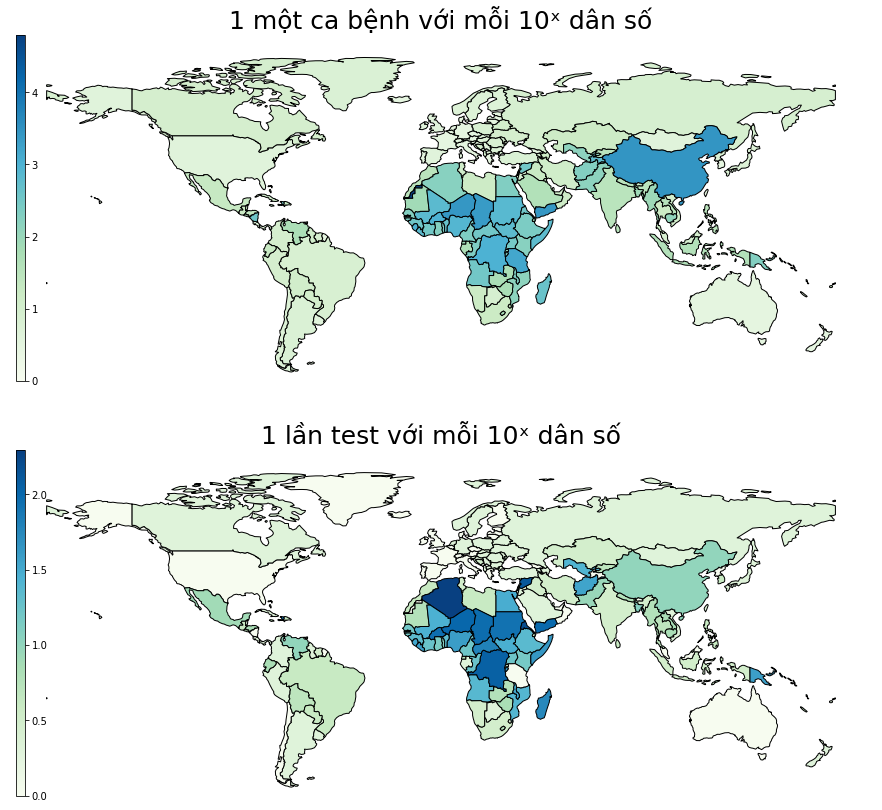

In [14]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(30, 14))

MapPlot('CasePerPPL', 
        data = data.assign(CasePerPPL = lambda x: x['1 Case every X ppl']+1),
        cmap = 'GnBu',
        ax=ax1,
        fig=fig, 
        Norm = np.log10)
ax1.set_title('1 một ca bệnh với mỗi 10ˣ dân số', fontdict={'fontsize': '25', 'fontweight': '3'})

MapPlot('CasePerPPL', 
        data = data.assign(CasePerPPL = lambda x: x['1 Test every X ppl']+1), 
        cmap = 'GnBu',
        ax=ax2,
        fig=fig, 
        Norm = np.log10)
ax2.set_title('1 lần test với mỗi 10ˣ dân số', fontdict={'fontsize': '25', 'fontweight': '3'})

Nhận xét biểu đồ:
- Nhìn sơ, ta có thể thấy được có thể thấy được tỉ lệ mắc bệnh có vẻ được phân bố theo một cách nào đó khi mà các nước có tỉ lệ nhiễm thấp lại ở gần nhau (Lục địa châu Phi) và phần nhỏ phía Tây Châu Á, nhưng đa phần các khu vực này có nhiệt độ và độ ẩm không thích hợp với Covid nên tỉ lệ bị nhiễm sẽ thấp hơn với phần còn lại của thế giới
- Tuy nhiên khi ta xem xét thêm về điều kiện kiểm tra bệnh, thì tại các khu vực này cũng có điều kiện kiểm tra thấp nhất trên toàn thế giới, vậy liệu điều này có phải là lí do giải thích cho việc khu vực này ghi nhận ít ca bênh hơn khu vực khác ?


In [30]:
px.scatter(
            x=covid_df['1 Test every X ppl'],
            y = covid_df['1 Case every X ppl'],
            log_y= True,log_x=True,
            trendline="lowess"
        )

In [16]:
np.log(covid_df[['1 Test every X ppl','1 Case every X ppl']]+1).corr()

,1 Test every X ppl,1 Case every X ppl
1 Test every X ppl,1.000000,0.782104
1 Case every X ppl,0.782104,1.000000


với biểu đồ và độ tương quan trên, ta thấy được phần nào đó mốt liên hệ giữa số người được test và số người mắc bệnh được ghi nhận, với độ tương quan (log) khá cao, nên có thể khẳng định là 2 chỉ số này có mối liên hệ rất đáng phải quan tâm

### Phần report

- Mối quan hệ giữa 2 trường dữ liệu `1 Test every X ppl` và `1 Case every X ppl`
    - Thư viện bổ sung: 
        - geopandas: giúp đỡ cho việc biểu diễn dữ liệu trên choropleth map

Các mối quan hệ:

1. Tỉ lệ người mắc Covid và tỉ lệ người được xét nghiệm Covid có sự phân bố theo vị trí địa lý của quốc gia trên thế giới không?
    - **Trường dữ liệu được trực quan:** `1 Test every X ppl` , `1 Case every X ppl`
    - **Biểu đồ sử dụng:** Choropleth map
    - **Tính phù hợp của biểu đồ:** Biểu đồ choropleth map cho phép chúng ta có thể nhìn thấy được thực tế tình trạng trên hình ảnh của toàn bộ thế giới, tuy rằng dữ liệu được trực quan lên sẽ không được hoàn toàn đầy đủ và chính xác như các biểu đồ số liệu khác, nhưng nó sẽ cho chúng ta một cái nhìn dễ dàng hơn trong việc so sánh sự ảnh hưởng của vị trí địa lý, điều này thì rất là khó để thể hiện trên các biểu đồ thông thường, và do thế chúng ra có thể nhận xét rõ hơn trên từng khu vực ta muốn, thay vì chỉ là từng quốc gia hay lục địa cụ thể
    - **Mục đích câu hỏi:** Kiểm tra xem sự lây lan của dịch Covid có khác nhau khi nhận xét tổng quan trên toàn bộ thế giới hay không, cũng như là tình trạng kiểm tra sức khỏe y tế của các khu vực
    - **Giải thích cách làm/thuật toán:** 
        - Đọc dữ liệu của tình trạng covid bằng thư viện pandas
        - Đọc dữ liệu vị trí địa lý của các quốc gia bằng data có sẵn của thư viện geopandas
        - Sửa lại tên của cột `name` của dữ liệu địa lý thành `Country` để tiện cho việc join bảng ở bước sau
        - Sửa lại tên của các quốc gia không khớp nhau giữa 2 dữ liệu covid và địa lý (ta sẽ kiểm tra thủ công ở bước này)
        - Tạo bảng data mới chứa dữ liệu của Covid cũng như vị trí quốc gia (kiểu dữ liệu geopandas)
        - Viết hàm tinh chỉnh để có thể vẽ lên Choropleth map bằng heatmap (để tiện cho sau này nên hàm này sẽ hơi dài)
        - Vẽ 2 biểu đồ với 2 cột dữ liệu `1 Test every X ppl` , `1 Case every X ppl`, và scale theo log (do thế ta sẽ fix dữ liệu để tránh trường hợp số 0) để có cái nhìn dễ hơn

        ![](./img_viz/make_data.PNG)
        ![](./img_viz/make_geomap.PNG)
        ![](./img_viz/plot_geomap.PNG)
    
    - **Kết quả:**
    
        ![](./img_viz/geomap.png)

    - **Nhận xét biểu đồ:**
        - Ta có thể thấy được có thể thấy được tỉ lệ mắc bệnh có vẻ được phân bố theo một cách nào đó khi mà các nước có tỉ lệ nhiễm thấp lại ở gần nhau (Lục địa châu Phi) và phần nhỏ Châu Á, đa phần các khu vực này có nhiệt độ và độ ẩm không thích hợp với Covid nên tỉ lệ bị nhiễm sẽ thấp hơn với phần còn lại của thế giới
        - Xem xét thêm về điều kiện kiểm tra bệnh, thì tại các khu vực này cũng có điều kiện kiểm tra thấp nhất trên toàn thế giới, vậy liệu điều này có phải là lí do giải thích cho việc khu vực này ghi nhận ít ca bênh hơn khu vực khác ?

------

2. Việc tỉ lệ kiểm tra y tế có ảnh hưởng đến số ca bênh được ghi nhận trên hệ thống hay không
    - **Trường dữ liệu được trực quan:** `1 Test every X ppl` , `1 Case every X ppl`
    - **Biểu đồ sử dụng:** Scatter chart.
    - **Tính phù hợp của biểu đồ:** Việc xem xét mối tương quan giữa 2 trường dữ liệu thì biểu đồ scatter vẫn cho ta một cái nhìn dễ nhất, khi mà tất cả điểm dữ liệu được trực quan trên một biểu đồ 1 cách rõ ràng, từ đó ta cũng có thể xem được phân bố của các dữ liệu này như thế nào
    - **Giải thích cách làm/thuật toán:**
        - Dùng thư viện plotpy để thể hiện biểu đồ này, và ta scale 2 trục theo log
        - Ta cũng bổ sung thêm một đường trendline (không phải linear), để có xem xét về mối tương quan giũa 2 biến

        ![](./img_viz/plot_scatter.PNG)

    - **Kết quả:**

        ![](./img_viz/scatterplot.png)

    - **Nhận xét biểu đồ:**
        - Tại mỗi mức chỉ số `1 Test every X ppl` thì ra thấy chỉ số `1 Case every X ppl` được phan bố hầu như trong một khoản xác định và có xu hướng hơi tăng dần
        - Từ biểu đồ này ta cũng thấy được rằng việc kiểm tra cũng phần nào ảnh ghi nhận ca nhiễm bênh trên thế giới, nên đây cũng là điều đáng phải quan tâm để có thể ghi nhận ca bệnh tốt nhất có thể
    
    